In [1]:
import math
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from skimage import color
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow_datasets as tfds

from os import listdir
from matplotlib import image

In [2]:
def return_random_subarray(arr1, arr2, proportion):
    num_to_get = math.floor(proportion * arr1.shape[0])
    indices = np.random.choice(arr1.shape[0], num_to_get, replace=False)
    new_arr_1 = arr1[indices]
    new_arr_2 = arr2[indices]
    return new_arr_1, new_arr_2

def train_and_test_LogRegr(x_train, y_train, x_test, y_test):
    logisticRegr = LogisticRegression(solver='saga', penalty='l2', max_iter=1000, tol=1e-3)

    logisticRegr.fit(x_train, y_train.ravel())
    logisticRegr.predict(x_test[:])
    
    print(logisticRegr.score(x_test, y_test.ravel()))
    return

def train_and_test_SGD(x_train, y_train, x_test, y_test):
    sgd = SGDClassifier(max_iter=1000, tol=1e-3)

    sgd.fit(x_train, y_train.ravel())
    sgd.predict(x_test[:])
    
    print(sgd.score(x_test, y_test.ravel()))
    return

In [ ]:
# (data_train, data_valid, data_test), dataset_info = tfds.load(
#     'deep_weeds',
#     split=['train[:60%]', 'train[60%:80%]', 'train[80%:]'],
#     with_info=True,
#     as_supervised = True
# )

In [3]:
def load_imgs(useGrayscale):
    loaded_images = []
    loaded_images_grayscale = []
    for filename in listdir('C:/Users/Kaleb/Downloads/images'):
        # load image
        img_data = image.imread('C:/Users/Kaleb/Downloads/images/' + filename)
        # store loaded image
        if(useGrayscale):
            loaded_images_grayscale.append(color.rgb2gray(img_data))
        else:
            loaded_images.append(img_data)
    if(useGrayscale):
        return loaded_images_grayscale
    else:
        return loaded_images

In [4]:
imgs_np = np.array(load_imgs(False))

In [ ]:
imgs_grayscale = np.array(load_imgs(True))

In [5]:
df = pd.read_csv (r"C:\Users\Kaleb\Downloads\labels.csv")
print (df)
labels = np.array(df["Label"])

                    Filename  Label       Species
0      20160928-140314-0.jpg      0  Chinee apple
1      20160928-140337-0.jpg      0  Chinee apple
2      20160928-140731-0.jpg      0  Chinee apple
3      20160928-140747-0.jpg      0  Chinee apple
4      20160928-141107-0.jpg      0  Chinee apple
...                      ...    ...           ...
17504  20180322-133822-1.jpg      8      Negative
17505  20180322-133832-1.jpg      8      Negative
17506  20180322-133840-1.jpg      8      Negative
17507  20180322-133850-1.jpg      8      Negative
17508  20180322-133901-1.jpg      8      Negative

[17509 rows x 3 columns]


In [ ]:
print(len(imgs_np))
print(len(labels))


In [20]:
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(imgs_np, 
                                                                    labels, 
                                                                    test_size=0.2, 
                                                                    shuffle=True,
                                                                    random_state=0)
print(x_train_all.shape)
print(y_train_all.shape)

(14007, 256, 256, 3)
(14007,)


In [ ]:
# Use this if grayscale image
x_train_gs, x_test_gs, y_train_gs, y_test_gs = train_test_split(imgs_grayscale, 
                                                                labels, 
                                                                test_size=0.2, 
                                                                shuffle=True,
                                                                random_state=0)

In [45]:
# Randomly sample training and test data, to reduce processing time later
x_train, y_train = return_random_subarray(x_train_all, y_train_all, 0.2)
x_test, y_test = return_random_subarray(x_test_all, y_test_all, 0.2)
print(x_train.shape)
print(x_test.shape)

(2801, 256, 256, 3)
(700, 256, 256, 3)


In [ ]:
# Randomly sample training and test data, to reduce processing time later
# Grayscale
x_train_gs, y_train_gs = return_random_subarray(x_train_gs, y_train_gs, 0.1)
x_test_gs, y_test_gs = return_random_subarray(x_test_gs, y_test_gs, 0.1)
print(x_train_gs.shape)
print(x_test_gs.shape)

In [ ]:
# Grayscale
x_train_2d_gs = x_train_gs.reshape((x_train_gs.shape[0], x_train_gs.shape[1]*x_train_gs.shape[2]))
x_test_2d_gs = x_test_gs.reshape((x_test_gs.shape[0], x_test_gs.shape[1]*x_test_gs.shape[2]))

In [ ]:
# PCA on scaled data
# Grayscale
variance = 0.995
pca = PCA(variance)
pca.fit(x_train_2d_gs)

x_train_pca = pca.transform(x_train_2d_gs)

x_test_pca = pca.transform(x_test_2d_gs)

x_test_inv = pca.inverse_transform(x_test_pca)

print(pca.n_components_)

In [ ]:
# Grayscale
IMAGE_TO_SHOW = 15
img_compressed = x_test_inv[IMAGE_TO_SHOW].reshape(256, 256)

plt.imshow(img_compressed)

In [ ]:
plt.imshow(x_test_gs[IMAGE_TO_SHOW])

In [46]:
nsamples_train, nx, ny, nz = x_train.shape
x_train_2d = x_train.reshape((nsamples_train,nx*ny*nz))
nsamples_test, nx, ny, nz = x_test.shape
x_test_2d = x_test.reshape((nsamples_test,nx*ny*nz))

In [ ]:
# scaler = StandardScaler()
# # Fit on training set only.
# scaler.fit(x_train_2d)
# # Apply transform to both the training set and the test set.
# x_train_scaled = scaler.transform(x_train_2d)
# x_test_scaled = scaler.transform(x_test_2d)

In [47]:
#Split into R, G and B channel data
print(x_train[:,:,:,0].shape)
x_train_2d_r = x_train[:,:,:,0].reshape((nsamples_train, nx*ny))
x_train_2d_g = x_train[:,:,:,1].reshape((nsamples_train, nx*ny))
x_train_2d_b = x_train[:,:,:,2].reshape((nsamples_train, nx*ny))
x_test_2d_r = x_test[:,:,:,0].reshape((nsamples_test, nx*ny))
x_test_2d_g = x_test[:,:,:,1].reshape((nsamples_test, nx*ny))
x_test_2d_b = x_test[:,:,:,2].reshape((nsamples_test, nx*ny))
print(x_train_2d_r.shape)
print(x_test_2d_r.shape)

(2801, 256, 256)
(2801, 65536)
(700, 65536)


In [48]:
# Scaling images
scaler_r = StandardScaler()
scaler_g = StandardScaler()
scaler_b = StandardScaler()
# Fit on training set only.
scaler_r.fit(x_train_2d_r)
scaler_g.fit(x_train_2d_g)
scaler_b.fit(x_train_2d_b)
# Apply transform to both the training set and the test set.
x_train_scaled_r = scaler_r.transform(x_train_2d_r)
x_train_scaled_g = scaler_g.transform(x_train_2d_g)
x_train_scaled_b = scaler_b.transform(x_train_2d_b)
x_test_scaled_r = scaler_r.transform(x_test_2d_r)
x_test_scaled_g = scaler_g.transform(x_test_2d_g)
x_test_scaled_b = scaler_b.transform(x_test_2d_b)

(256, 78)


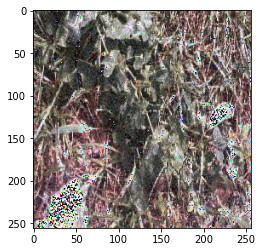

In [43]:
# PCA for a single image
SINGLE_IMG_INDEX = 6
red_example = x_train[SINGLE_IMG_INDEX][:,:,0]
green_example = x_train[SINGLE_IMG_INDEX][:,:,1]
blue_example = x_train[SINGLE_IMG_INDEX][:,:,2]

pca = PCA(0.9)
red_pca = pca.fit_transform(red_example)
red_inv = pca.inverse_transform(red_pca)
green_pca = pca.fit_transform(green_example)
green_inv = pca.inverse_transform(green_pca)
blue_pca = pca.fit_transform(blue_example)
blue_inv = pca.inverse_transform(blue_pca)
print(blue_pca.shape)

img_compressed = (np.dstack((red_inv.reshape(256,256), green_inv.reshape(256,256), blue_inv.reshape(256,256)))).astype(np.uint8)

plt.imshow(img_compressed)

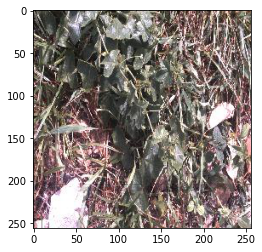

In [44]:
plt.imshow(x_train[SINGLE_IMG_INDEX])

In [24]:
# PCA on non-scaled data
variance = 0.995
pca_r = PCA(variance)
pca_g = PCA(variance)
pca_b = PCA(variance)
pca_r.fit(x_train_2d_r)
pca_g.fit(x_train_2d_g)
pca_b.fit(x_train_2d_b)

x_train_pca_r = pca_r.transform(x_train_2d_r)
x_train_pca_g = pca_g.transform(x_train_2d_g)
x_train_pca_b = pca_b.transform(x_train_2d_b)

x_test_pca_r = pca_r.transform(x_test_2d_r)
x_test_pca_g = pca_g.transform(x_test_2d_g)
x_test_pca_b = pca_b.transform(x_test_2d_b)

x_test_inv_r = pca_r.inverse_transform(x_test_pca_r)
x_test_inv_g = pca_g.inverse_transform(x_test_pca_g)
x_test_inv_b = pca_b.inverse_transform(x_test_pca_b)

print(pca_r.n_components_)

1363


In [25]:
print('Original shape: ', x_train_2d_r.shape)
print('Shape afer PCA: ', x_train_pca_r.shape)

Original shape:  (1400, 65536)
Shape afer PCA:  (1400, 1363)


In [49]:
# PCA on scaled data
variance = 0.995
pca_r = PCA(variance)
pca_g = PCA(variance)
pca_b = PCA(variance)
pca_r.fit(x_train_scaled_r)
pca_g.fit(x_train_scaled_g)
pca_b.fit(x_train_scaled_b)

x_train_pca_r = pca_r.transform(x_train_scaled_r)
x_train_pca_g = pca_g.transform(x_train_scaled_g)
x_train_pca_b = pca_b.transform(x_train_scaled_b)

x_test_pca_r = pca_r.transform(x_test_scaled_r)
x_test_pca_g = pca_g.transform(x_test_scaled_g)
x_test_pca_b = pca_b.transform(x_test_scaled_b)

x_test_inv_r = pca_r.inverse_transform(x_test_pca_r)
x_test_inv_g = pca_g.inverse_transform(x_test_pca_g)
x_test_inv_b = pca_b.inverse_transform(x_test_pca_b)

print(pca_r.n_components_)

2718


In [54]:
print(x_test_pca_r.size)
print(x_test_pca_g.size)
print(x_test_pca_b.size)

1902600
1903300
1905400


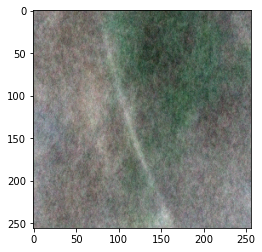

In [32]:
IMAGE_TO_SHOW = 50

img_compressed = (np.dstack((x_test_inv_r[IMAGE_TO_SHOW].reshape(nx, ny), x_test_inv_g[IMAGE_TO_SHOW].reshape(nx, ny), x_test_inv_b[IMAGE_TO_SHOW].reshape(nx, ny)))).astype(np.uint8)

plt.imshow(img_compressed)

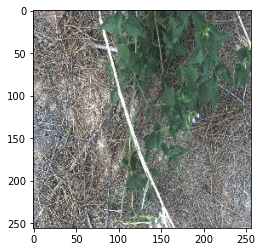

In [33]:
plt.imshow(x_test[IMAGE_TO_SHOW])

In [ ]:
x_train_pca_r.shape

In [50]:
x_train_pca = np.concatenate((x_train_pca_r, x_train_pca_g, x_train_pca_b), axis=1)
x_test_pca = np.concatenate((x_test_pca_r, x_test_pca_g, x_test_pca_b), axis=1)

print(x_train_pca.shape, x_test_pca.shape)

(2801, 8159) (700, 8159)


In [51]:
train_and_test_LogRegr(x_train_pca, y_train, x_test_pca, y_test)

0.3628571428571429


In [52]:
train_and_test_SGD(x_train_pca, y_train, x_test_pca, y_test)

0.41714285714285715
